In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

In [2]:
df = pd.read_csv('C:/Users/EL087/Desktop/MS_MachineLearning/data/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# 의사결정트리 회귀

- 의사결정 트리라는 구조를 사용하여 연속적인 값을 예측하는 머신러닝 방법
- 분류(Classification) 문제에 트리와 기본 원리는 같지만, 예측의 최종 결과가 확률이나 클래스가 아닌 실수 값이라는 점이 다름

🌳 의사결정 트리 회귀의 작동 원리
- 의사결정 트리는 데이터를 **가장 잘 분할하는 기준(독립변수와 임계값)**을 찾아 **재귀적(Recursive)**으로 나누는 과정을 반복

**1. 분할 기준 (Splitting Criteria)**
- 목표: 각 분할 지점에서 데이터의 **분산(Variance) 또는 불순도(Impurity)**를 최소화하는 독립변수와 임계값을 찾음  
 회귀 트리에서는 주로 **MSE(Mean Squared Error)**나 **MAE(Mean Absolute Error)**와 같은 손실 함수를 사용하여 이 분산 감소량을 측정

- 작동: 데이터를 나눴을 때, 새로 생성된 자식 노드들이 이전 노드보다 훨씬 더 **균질(Homogeneous)**해지도록(즉, 노드 내 데이터의 $Y$ 값들의 차이가 작아지도록) 분할

**2. 예측 (Prediction)**
- 최종 노드 (Leaf Node): 트리의 가장 말단에 있는 노드에는 더 이상 분할되지 않은 최종 데이터 그룹이 포함

- 예측값: 새로운 데이터가 이 최종 노드에 도착하면, 이 노드에 속한 훈련 데이터 $Y$ 값들의 평균을 예측값으로 반환

**3. 결과**

- 회귀 트리의 최종 출력은 데이터 공간을 여러 개의 직사각형 영역으로 나누고,   
    각 영역($\text{Leaf Node}$)에 대해 **하나의 상수값(평균)**을 예측값으로 할당한 형태

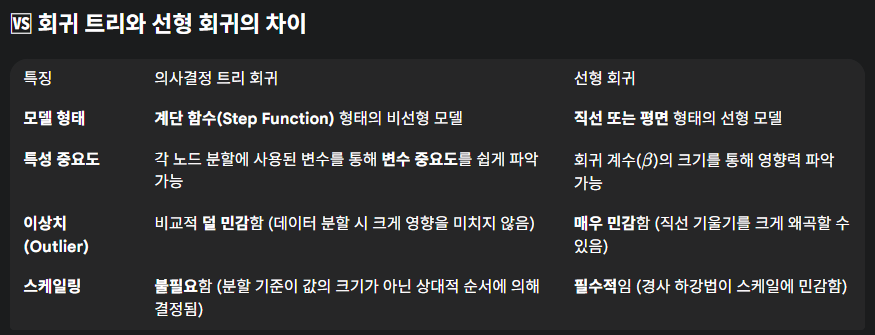

## 변수 선택
* 3가지 독립변수 모두 선택

In [3]:
# -----------------------------------
# 독립변수, 종속변수 선택
# -----------------------------------
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

## 훈련세트 테스트세트 분할

In [4]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(150, 3) (50, 3) (150,) (50,)


## 모델 생성 및 훈련

In [5]:
# ------------------------------------------
# 의사결정트리 클래스 import
# ------------------------------------------
from sklearn.tree import DecisionTreeRegressor

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = DecisionTreeRegressor(random_state=42)

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

In [6]:
# 의사결정트리 회귀 모델의 훈련 세트에 대한 성능 점수 (회귀 모델의 성능을 평가, 결정계수 R^2값)
model.score(X_train, y_train)

1.0

🌳 $R^2 = 1.0$이 의미하는 것 (과적합)

1. 🥇 $R^2=1$의 수학적 의미

    $R^2$ 값이 1이라는 것은 모델의 예측값($\hat{y}$)이 실제 값($y$)과 100% 일치한다는 의미 (즉, $\text{MSE}$ (평균 제곱 오차)가 0)

2. 🤖 의사결정 트리의 기본 설정

    DecisionTreeRegressor()를 기본 설정으로 사용하면,  
    트리는 데이터가 있는 한 노드의 샘플이 하나가 되거나 모두 동일한 값을 가질 때까지 분할을 멈추지 않습니다(max_depth=None)
- 결과: 트리가 매우 깊어지면서 훈련 세트의 모든 데이터 포인트에 대해 개별적인 규칙을 만들고,  
 해당 포인트가 속한 노드의 평균값(즉, 자기 자신)을 완벽하게 예측 (즉, 데이터를 통째로 외워버림)

3. 📉 일반화 성능과의 관계

    이 $R^2=1.0$은 모델이 훈련 데이터를 외운 정도를 나타낼 뿐, **(테스트 세트)**에 대한 예측 실력은 아닐 가능성이 높음

## 평가

In [7]:
from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
y_pred = model.predict(X_test)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('===의사결정트리 회귀 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===의사결정트리 회귀 모델의 평가결과===
R2:0.8503
RMSE:2.0175
MAE:1.5080
MSE:4.0704


- 과적합이 발생했다고 볼 수 있음

    **훈련 성능(1.0)**과 테스트 성능(0.85) 사이에 15%라는 큰 격차가 존재  
    이는 모델이 훈련 데이터의 잡음까지 외워버린 반면, 테스트 세트에서는 그 외운 지식이 제대로 통하지 않아 성능이 하락했음을 의미

🛠️ 조치 방법

과적합을 해결하고 테스트 $R^2$ 값을 높이려면, 모델의 복잡도를 낮추는 **규제(Regularization)**를 적용해야 함  
의사결정 트리의 경우 주로 다음 하이퍼파라미터를 제한
- 트리의 최대 깊이 제한 (max_depth): 가장 강력한 규제 방법 
- 리프 노드의 최소 샘플 수 제한 (min_samples_leaf): 최종 노드(Leaf Node)에 최소한 몇 개의 샘플이 있어야 하는지 지정하여 불필요한 분할을 방지

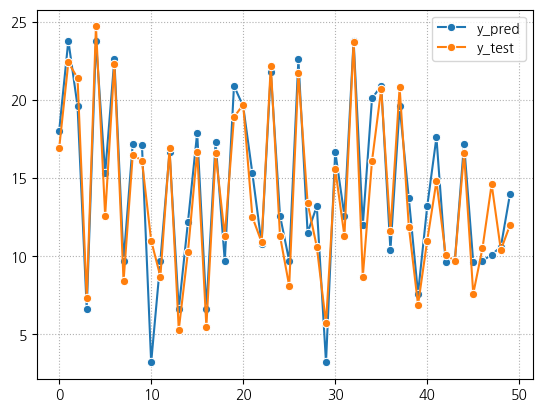

In [8]:
# ------------------------------------
# 실제값과 예측값 시각화 비교
# ------------------------------------
sns.lineplot(y_pred, marker='o', label='y_pred')
sns.lineplot(np.array(y_test), marker='o', label='y_test')
plt.grid(ls=':')
plt.legend()
pass

## 모델의 학습 결과

In [9]:
# ------------------------------------
# 트리의 깊이
# ------------------------------------
model.get_depth()

13

🌳 트리의 깊이가 모델에 미치는 영향

1. 📈 깊이가 클수록: 과적합(Overfitting) 위험 증가

    트리의 깊이가 너무 깊다는 것은, 모델이 데이터를 매우 세부적으로 나누어 훈련 데이터에 있는 미세한 잡음(Noise)이나 예외적인 패턴까지 외웠다는 의미
- 문제: 모델이 훈련 데이터에 대해서는 거의 완벽한 예측($R^2 \approx 1$)을 보일 수 있지만,  
    새로운(테스트) 데이터가 들어오면 이 미세한 패턴이 맞지 않아 예측 성능이 급격히 떨어짐
- 상황: 깊이가 깊을수록 모델이 복잡해짐

2. 📉 깊이가 작을수록: 과소적합(Underfitting) 위험 증가

    트리의 깊이가 너무 얕다면, 모델이 데이터의 중요한 패턴을 충분히 학습하지 못하고 너무 단순하게 일반화함
- 문제: 모델이 데이터의 복잡한 관계를 파악하지 못하여 훈련 세트와 테스트 세트 모두에서 성능이 낮게 나옴
- 상황: 깊이가 얕을수록 모델이 단순해짐

🎯 적절한 깊이의 중요성

이상적인 트리의 깊이는 모델이 훈련 데이터의 패턴을 충분히 학습하면서도, 테스트 데이터에 대한 일반화 능력을 잃지 않는 지점

트리의 깊이(max_depth)는 모델 학습 전에 설정해야 하는 하이퍼파라미터이며,  
보통 **교차 검증(Cross-Validation)**을 통해 최적의 깊이(예: 3~8 사이)를 찾음

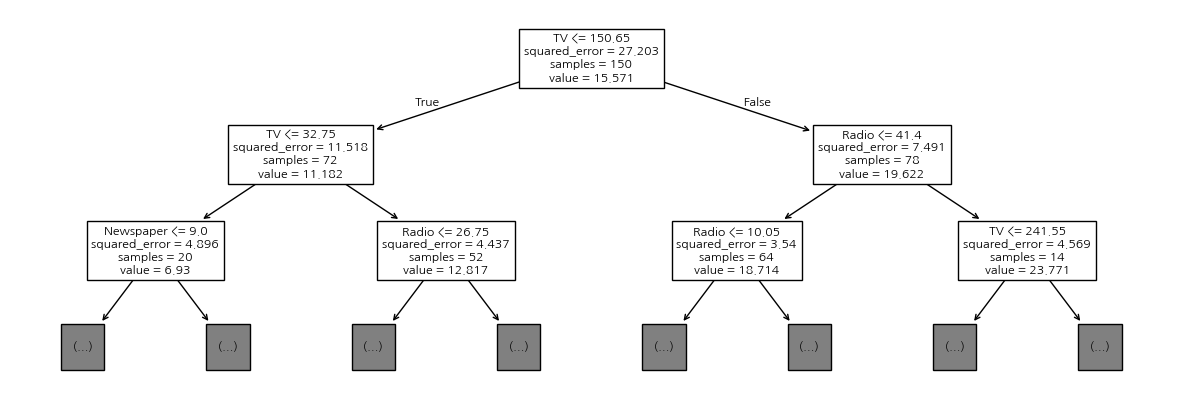

In [10]:
# ------------------------------------
# 트리 시각화
# ------------------------------------
from sklearn.tree import plot_tree
plt.figure(figsize=(15,5))
plot_tree(model, max_depth=2, feature_names=X_train.columns)
pass

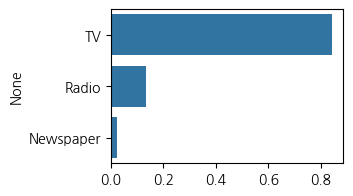

In [11]:
# ------------------------------------
# 특성의 중요도
# ------------------------------------
plt.figure(figsize=(3,2))
sns.barplot(y=X_train.columns, x=model.feature_importances_);

## 과대적합여부 확인

In [12]:
# -----------------------------------
# 훈련데이터의 예측값
# -----------------------------------
y_train_pred = model.predict(X_train)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_train, y_train_pred)
rmse = root_mean_squared_error(y_train, y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

print('===의사결정트리 회귀 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===의사결정트리 회귀 모델의 평가결과===
R2:1.0000
RMSE:0.0000
MAE:0.0000
MSE:0.0000


# 랜덤포레스트 회귀

- 랜덤 포레스트 회귀(Random Forest Regression)는 앙상블 학습(Ensemble Learning) 기법 중 하나
- 다수의 독립적인 의사결정 트리(Decision Trees)를 만들어 그 예측 결과들의 평균을 내어 최종 예측값을 얻는 모델

🌳 랜덤 포레스트의 핵심 원리

- 랜덤 포레스트가 단일 의사결정 트리의 단점을 극복하고 높은 성능을 보이는 두 가지 핵심 무작위성(Randomness)은 다음과 같음

**1. 데이터 무작위성 (Bagging/Bootstrap Aggregating)**  
- 모델을 훈련할 때, 전체 훈련 데이터에서 무작위로 복원 추출한 서브셋(Subset)을 생성

- 각각의 서브셋에 대해 독립적인 하나의 트리를 훈련시킴
- 이 방식 덕분에 각 트리는 전체 데이터의 미묘하게 다른 부분을 학습하게 되어, 서로 다른 예측 오류를 가지게 됨

**2. 특성 무작위성 (Feature Randomness)**  
- 각 트리가 노드를 분할할 때, 전체 독립 변수($X$) 중에서 일부 특성만을 무작위로 선택하여 최적의 분할 기준을 찾도록 제한

- 이 과정은 모든 트리가 항상 가장 강력한 단일 특성에만 의존하는 것을 방지하고, 모델의 다양성(Diversity)을 높여줌

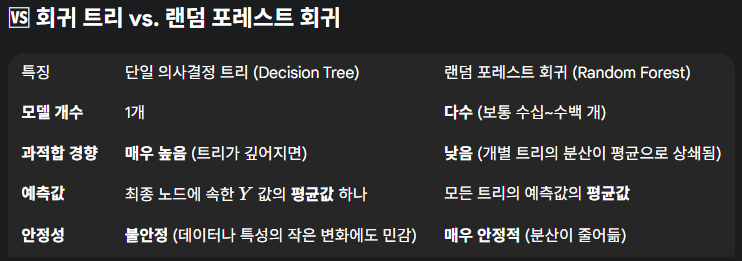

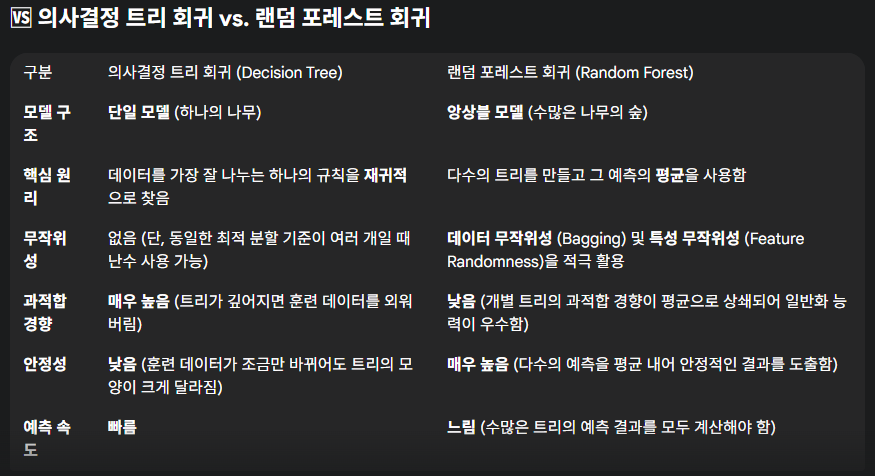

## 머신러닝

In [13]:
# ------------------------------------------
# RandomForestRegressor 클래스 import
# ------------------------------------------
from sklearn.ensemble import RandomForestRegressor

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = RandomForestRegressor(random_state=42)

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

In [14]:
# 랜덤 포레스트 회귀 모델의 훈련 세트에 대한 성능 점수 (회귀 모델의 성능을 평가, 결정계수 R^2값)
model.score(X_train, y_train)

0.9908607241570272

- 훈련 $R^2 = 0.9909$ 이므로 과적합이 의심됨
- 랜덤 포레스트는 **Bagging(부트스트랩 샘플링)**을 통해 개별 트리의 과적합을 평균으로 상쇄시키지만,  
 기본 설정은 트리를 깊게 만들고 충분한 특성(Feature)을 고려하도록 허용하기 때문에   
 훈련 데이터에 대해 이처럼 비정상적으로 높은 점수가 나오는 것은 일반화 능력을 해칠 수 있는 과적합 상태일 가능성이 높습니다.

## 평가

In [15]:
from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
y_pred = model.predict(X_test)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('===랜덤포레스트 회귀 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===랜덤포레스트 회귀 모델의 평가결과===
R2:0.9428
RMSE:1.2475
MAE:0.9289
MSE:1.5562


- 과적합이 발생했다고 볼 수 있음

    **훈련 성능(0.9909)**과 테스트 성능(0.9428) 사이에 약 4.8%라는 격차가 존재  
    이는 훈련 $R^2$가 1.0에 가깝게 높게 나온 것이 모델이 훈련 데이터의 잡음까지 학습했음을 의미  
    반면, 약 5% 포인트의 성능 하락이 발생했다는 것은 모델이 너무 복잡하여 일반화 능력을 약간 희생했음을 보여줍

🛠️ 조치 방법

모델의 안전성을 높이고 잠재적인 과적합을 줄이기 위해, 랜덤 포레스트의 하이퍼파라미터 튜닝을 통해 **규제**를 적용해야 함 

주요 튜닝 파라미터:
- n_estimators: 트리의 개수를 늘려 안정성을 높임 (이미 충분히 많다면 효과가 제한적)
- max_depth: 개별 트리의 최대 깊이를 제한하여 복잡도를 낮춤 (가장 효과적인 방법)
- min_samples_leaf: 리프 노드가 되기 위한 최소 샘플 수를 늘려 분할을 제한

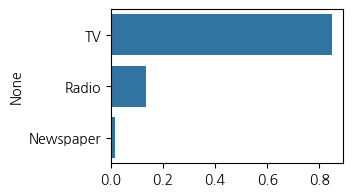

In [16]:
# --------------------
# 특성의 중요도
# --------------------
plt.figure(figsize=(3,2))
sns.barplot(y=X_train.columns, x=model.feature_importances_);

# K-최근접 이웃 회귀

- 비모수적(non-parametric) 모델
- 새로운 데이터 포인트의 값을 예측할 때 가장 가까운 $k$개의 이웃 데이터 포인트들의 평균값을 사용하는 간단하고 직관적인 회귀 방법

🔎 k-최근접 이웃 회귀의 작동 원리

- k-NN 회귀는 모델을 명시적으로 학습시키는 것이 아니라, 전체 훈련 데이터셋을 그대로 저장해두고 예측 시점에만 사용

**1. 새로운 데이터 포인트($X_{\text{new}}$) 입력**: 예측을 원하는 새로운 데이터 포인트가 주어짐

**2. 거리 계산**: 이 새로운 포인트와 훈련 세트의 모든 데이터 포인트 간의 거리를 측정 (주로 유클리드 거리 사용)

**3. $k$개 이웃 선택**: 계산된 거리를 기준으로 가장 가까운 $k$개의 훈련 데이터 포인트를 선택

**4. 평균 예측**: 선택된 $k$개 이웃의 종속 변수($Y$) 값들의 평균을 새로운 포인트의 예측값($\hat{Y}$)으로 사용

$$\hat{Y}_{\text{new}} = \frac{1}{k} \sum_{i=1}^{k} Y_i$$

💡 주요 특징 및 $k$의 역할

**1. $k$ 값의 중요성**

$k$는 사용자가 사전에 지정해야 하는 하이퍼파라미터
- $k$가 작을 때 (예: $k=1$): 모델이 복잡해지고 훈련 데이터의 잡음(Noise)에 민감해져 **과적합(Overfitting)**될 위험이 높아짐
- $k$가 클 때: 모델이 단순해지고 너무 많은 이웃의 평균을 사용하여 데이터의 미세한 패턴을 놓칠 수 있음 (과소적합)

**2. 비모수적 모델**

k-NN은 선형 회귀처럼 데이터의 분포나 관계에 대한 **어떤 가정(모수)**도 하지 않기 때문에 비모수적 모델로 분류됨  
데이터가 주어지는 형태 그대로 예측에 반영

**3. 스케일링의 중요성**

거리 기반 알고리즘이기 때문에, 독립 변수들의 스케일이 다를 경우(예: 하나는 0~100, 다른 하나는 0~1),  
스케일이 큰 변수가 거리 계산에 과도하게 영향을 미침  
따라서 k-NN을 사용하기 전에는 반드시 데이터를 스케일링해야 함

In [17]:
# ------------------------------------------
# KNeighborsRegressor 클래스 import
# ------------------------------------------
from sklearn.neighbors import KNeighborsRegressor

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = KNeighborsRegressor()   # 기본 값은 n_neighbors = 5

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

In [18]:
# K-최근접 이웃 회귀 모델의 훈련 세트에 대한 성능 점수 (회귀 모델의 성능을 평가, 결정계수 R^2값)
model.score(X_train, y_train)

0.9341357971119434

- $R^2$ 값이 **$0.9341$**로 매우 높기 때문에 과적합이 의심됨

In [19]:
from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            root_mean_squared_error, \
                            r2_score

# -----------------------------------
# 테스트데이터의 예측값
# -----------------------------------
y_pred = model.predict(X_test)

# -----------------------------------
# 모델 평가
# -----------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('===K-최근접 이웃 회귀 모델의 평가결과===')
print(f'R2:{r2:.4f}')
print(f'RMSE:{rmse:.4f}')
print(f'MAE:{mae:.4f}')
print(f'MSE:{mse:.4f}')

===K-최근접 이웃 회귀 모델의 평가결과===
R2:0.8885
RMSE:1.7409
MAE:1.3160
MSE:3.0306


- 과적합이 발생했다고 볼 수 있음

    **훈련 성능(0.9341)**과 테스트 성능(0.8885) 사이에 약 4.56%라는 격차가 존재  
    이는 훈련 $R^2$가 1.0에 가깝게 높게 나온 것이 모델이 훈련 데이터의 잡음까지 학습했음을 의미  
   
- k-NN 모델에서 이러한 격차는 $\mathbf{k}$ (이웃 수) 값이 너무 작게 설정되었을 때 흔히 발생  
     $k$가 작으면 모델이 국소적인 패턴에만 집중하여 과적합됨

🛠️ 조치 방법

모델의 일반화 성능을 높이려면 $\mathbf{k}$ 값을 늘리는 튜닝이 필요 

- $\mathbf{k}$ 값을 증가시키면, 예측 시 더 많은 이웃의 평균을 사용하게 되므로 모델이 더 단순하고 안정적으로 변함

- 이 과정은 훈련 $R^2$를 약간 낮추고, 테스트 $R^2$를 높이는 방향으로 작용하여 두 값 사이의 격차를 줄여줌